# 서녕이와의 카카오톡 대화 분석

## 1. import dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [2]:
from konlpy.tag import Okt
okt = Okt()

In [8]:
data = pd.read_csv('C:/Users/samsung/Desktop/kakao.txt',sep=' ',header=None,
                  error_bad_lines=False)

b'Skipping line 2: expected 4 fields, saw 5\nSkipping line 4: expected 4 fields, saw 6\nSkipping line 5: expected 4 fields, saw 5\nSkipping line 6: expected 4 fields, saw 7\nSkipping line 8: expected 4 fields, saw 5\nSkipping line 9: expected 4 fields, saw 11\nSkipping line 15: expected 4 fields, saw 8\nSkipping line 16: expected 4 fields, saw 7\nSkipping line 20: expected 4 fields, saw 5\nSkipping line 21: expected 4 fields, saw 11\nSkipping line 22: expected 4 fields, saw 6\nSkipping line 23: expected 4 fields, saw 8\nSkipping line 28: expected 4 fields, saw 8\nSkipping line 30: expected 4 fields, saw 6\nSkipping line 31: expected 4 fields, saw 5\nSkipping line 32: expected 4 fields, saw 5\nSkipping line 33: expected 4 fields, saw 6\nSkipping line 34: expected 4 fields, saw 7\nSkipping line 35: expected 4 fields, saw 7\nSkipping line 36: expected 4 fields, saw 6\nSkipping line 38: expected 4 fields, saw 6\nSkipping line 39: expected 4 fields, saw 8\nSkipping line 42: expected 4 field

In [9]:
corpus = data[3]

## 2. EDA

In [11]:
import nltk

total_tokens = [token for msg in corpus for token in str(msg).split()]

In [12]:
len(total_tokens)

128926

In [13]:
text = nltk.Text(total_tokens, name='kakao')

In [14]:
print(len(set(text.tokens)))
print(text.vocab().most_common(10))

56269
[('이모티콘', 11344), ('ㅎㅎ', 6582), ('웅웅', 2014), ('ㅎㅎㅎ', 1460), ('사진', 1444), ('ㅠ', 1045), ('[오후', 821), ('응응', 688), ('ㅋㅋㅋㅋㅋㅋㅋ', 644), ('우웅', 640)]


In [17]:
import matplotlib.pyplot as plt
import platform
from matplotlib import font_manager, rc,rcParams
%matplotlib inline

In [18]:
def set_korea_font():
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    rcParams.update({'font.size': 11})
    rcParams['axes.unicode_minus'] = False  
set_korea_font()

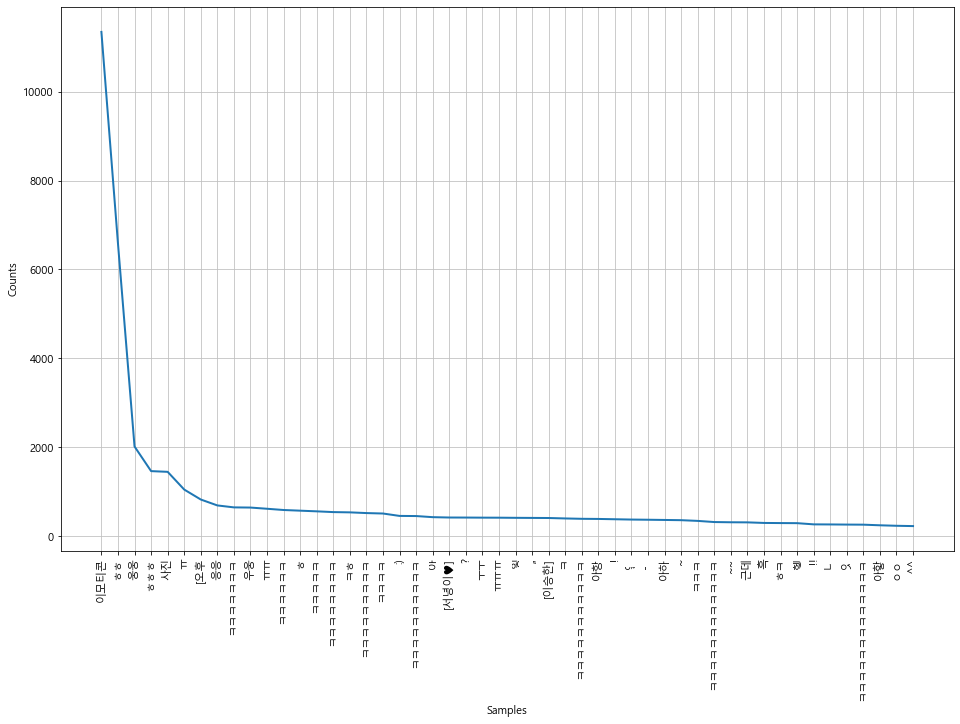

In [19]:
plt.figure(figsize=(16,10))
text.plot(50)

## 3. Data Preprocessing

In [20]:
import re

def ms_clean(docs):
    '''
    1. 사진, 이모티콘 제거
    2. 자/모음 처리 방법
      1) 'ㅇㅇㅇ','ㅋㅋㅋ'는 판단하여 제거할지 생각
    3. http://로 시작하는 하어퍼링크 제거
    4. 특수문자 제거
    '''
    # Series의 object를 str으로
    docs = [str(doc) for doc in corpus]
    
    # (1) 사진,이모티콘 제거
    pattern1 = re.compile('사진|이모티콘')
    docs = [pattern1.sub("",doc) for doc in docs]
    
    # (2) 자음/모음 제거
    pattern2 = re.compile("[ㄱ-ㅎ|[ㅏ-ㅣ]+")
    docs = [pattern2.sub("",doc) for doc in docs]
    
    # (3) 하이퍼링크 제거
    pattern3 = re.compile(r"\b(https?:\/\/)?([\w.]+){1,2}(\.[\w]{2,4}){1,2}(.*)")
    docs = [pattern3.sub("",doc) for doc in docs]
    
    # (4) 특수문자 제거
    pattern4 = re.compile("[\{\}\[\]\/?.,;:|\)*~`!^\-+<>@\#$%&\\\=\(\'\"]")
    docs = [pattern4.sub("",doc) for doc in docs]
    
    return docs

( 불용어 제거하고 싶다면 )

In [21]:
def stopwords(path):
    sw = set()
    with open(path,encoding='UTF8') as f:
        for word in f:
            sw.add(word[:-1])
    return sw

In [23]:
SW = stopwords('stopwords-ko.txt')

In [22]:
def text_tokenize(doc):
    return [w for w in okt.morphs(doc) if word not in SW and len(word) > 1]
    #return [w for w in okt.nouns(doc) if word not in SW and len(word) > 1]

final result

In [24]:
cleaned_corpus = ms_clean(corpus)
cleaned_text = pd.Series(cleaned_corpus)
data[3] = cleaned_text

In [25]:
cleaned_data = data[data[3]!=""]
cleaned_data = cleaned_data[1:]
cleaned_data = cleaned_data[[0,3]]

In [26]:
cleaned_data.columns = ['user','message']

In [28]:
import pickle

with open('cleaned_data.pk','wb') as f:
    pickle.dump(cleaned_data,f)